# The Language of Quotations in Journals

Do specialists quote different types of language from nonspecialists? 

In this notebook we compare writing in Victorianist versus non-Victorianist journals, looking at both **words in *Middlemarch* quotations** as well as **words in "context chunks" of critical discourse** around quotations (the 200 characters before and 750 characters after each identified quotation). 

For the full list of journals classified as "Victorianist" in our JSTOR dataset, see: [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/list-of-Victorianist-journals.csv](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/list-of-Victorianist-journals.csv)

For the notebook containing scripts for generating context chunks of critical discourse around *Middlemarch* quotations, see: [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/notebooks/extracting-and-analyzing-context-chunks-from-index-characters.ipynb](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/notebooks/extracting-and-analyzing-context-chunks-from-index-characters.ipynb)

In [2]:
!pip install -qU spacy

In [4]:
!pip install -qU textacy

In [ ]:
!python -m spacy download en_core_web_sm

In [6]:
import spacy
import textacy
import nltk
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
mm = open('../middlemarch.txt').read()

In [8]:
df = pd.read_json('../../../Middlematch/hyperparameter-data/t2-c3-n2-m3-no-stops.json')

---

## Victorianist journals - most distinctive words (MDWs) in scholarly discourse context chunks

In the following section we analyze the MDWs for the context chunks (the 200 characters before and 750 characters after each *Middlemarch* quotation in a Victorianist journal)

In [9]:
df = pd.read_json('../../../Middlematch/hyperparameter-data/t2-c3-n2-m3-no-stops.json')

In [ ]:
df

In [6]:
df['journal'] = df['isPartOf']

In [7]:
grouped = df.groupby('isPartOf')

In [17]:
list_of_VS_journals = ['Victorian Studies', 'George Eliot - George Henry Lewes Studies', 'Nineteenth-Century Fiction', 'Nineteenth-Century Literature', 'Dickens Studies Annual', 'Victorian Literature and Culture', 'Victorian Review', 'The George Eliot, George Henry Lewes Newsletter', 'Victorian Periodicals Review', 'Dickens Quarterly', 'Victorian Poetry', 'The Thomas Hardy Journal', 'The Gaskell Society Journal', 'The Gaskell Journal', 'Newsletter of the Victorian Studies Association of Western Canada', 'Dickens Studies Newsletter', 'Browning Institute Studies', 'Victorian Periodicals Newsletter', 'Carlyle Studies Annual', 'Conradiana', 'Tennyson Research Bulletin', 'The Conradian', 'The Hardy Society Journal', 'The Hardy Review', 'Studies in Browning and His Circle', 'Nineteenth-Century French Studies', 'The Wilkie Collins Journal', 'Carlyle Newsletter', 'The Wildean', 'Dickens Studies', 'Carlyle Annual', '19th-Century Music', 'The Trollopian', 'Conrad Studies']

In [18]:
def getText(ranges): 
    texts = []
    for rangeSet in ranges: 
        for textRange in rangeSet: 
#             print(textRange)
            if len(textRange) > 1: 
                text = mm[textRange[0]:textRange[1]]
                texts.append(text)
    return texts

In [19]:
journalDict = {}
for journal in grouped: 
    journalDict[journal[0]] = journal[1]['Locations in A'].values

In [20]:
textDict = {}
for journal in journalDict: 
    textDict[journal] = getText(journalDict[journal])

In [21]:
vsDict = {}
for journal in journalDict:
    if journal in list_of_VS_journals:
        vsDict[journal] = getText(journalDict[journal])

In [25]:
notVsDict = {}
for journal in journalDict:
    if journal not in list_of_VS_journals:
        notVsDict[journal] = getText(journalDict[journal])

In [22]:
specialistText = ' '.join([' '.join(item) for item in vsDict.values()])
#specialistText = ' '.join([' '.join(item) for item in textDict.values() if item in list_of_VS_journals])
specialistText = specialistText.replace('\n', ' ')

In [50]:
specialistText = open('../../../Middlematch/VS-and-Victorian-studies/quotation-contexts-Victorianist-journals-200-char-before-and-750-after.txt').read()

In [42]:
nonSpecialistText = ' '.join([' '.join(item) for item in notVsDict.values()])
nonSpecialistText = nonSpecialistText.replace('\n', ' ')

In [67]:
nonSpecialistText = open('../../../Middlematch/VS-and-Victorian-studies/quotation-contexts-Non-Victorianist-journals-200-char-before-and-750-after.txt').read()

In [69]:
en = textacy.load_spacy_lang("en_core_web_sm")

In [70]:
en.max_length = 2402260

In [71]:
# alt version for all quotes
st = textacy.make_spacy_doc(specialistText, lang=en)
nst = textacy.make_spacy_doc(nonSpecialistText, lang=en)

In [ ]:
st = textacy.make_spacy_doc(specialistText, lang='en_core_web_sm')
nst = textacy.make_spacy_doc(nonSpecialistText, lang='en_core_web_sm')

In [73]:
print(nst._.preview)

Doc(493907 tokens: "ender roles, etc.- rush past in a flash. As a d...")


In [74]:
from textacy import extract

In [75]:
textacy.set_doc_extensions("extract")

In [76]:
stBag = extract.bags.to_bag_of_terms(st, ngs=1, by="lemma_", weighting='freq')
nstBag = extract.bags.to_bag_of_terms(nst, ngs=1, by="lemma_", weighting='freq')

In [77]:
stArray = pd.Series(stBag)
nstArray = pd.Series(nstBag)

In [78]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [79]:
# Negative values are distinctive of non- Victorianist journals. 
# Positive values are distinctive of Victorianist journals. 
(stArray - nstArray).fillna(0).sort_values()

world                                                                                                                      -3.597102e-04
de                                                                                                                         -3.238257e-04
life                                                                                                                       -3.085589e-04
M                                                                                                                          -2.327623e-04
act                                                                                                                        -2.285504e-04
tell                                                                                                                       -2.283816e-04
leave                                                                                                                      -2.204767e-04
way                                      

## Victorianist journals  - most frequent words in scholarly discourse context chunks

In the following section we analyze words, ranked by sheer frequency in for the context chunks (the 200 characters before and 750 characters after each *Middlemarch* quotation in a Victorianist journal). Stopwords are excluded and listed below.

In [48]:
import re
from collections import Counter

# Define Functions

def split_into_words(any_chunk_of_text):
    lowercase_text = any_chunk_of_text.lower()
    split_words = re.split("\W+", lowercase_text) 
    return split_words

# Define Filepaths and Assign Variables

#directory_path = f'{name_of_quote}_contexts/'
#filename = f'quotation-contexts-{name_of_quote}.txt'
name_of_text = specialistText
name_of_file = "Victorianist-journals"
number_of_desired_words = 50

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 'll', 'amp',
]

most_frequent_non_stopwords = []


full_text = name_of_text
all_the_words = split_into_words(full_text)
non_stopwords = [word for word in all_the_words if word not in stopwords]
non_stopwords_tally = Counter(non_stopwords)
most_frequent_non_stopwords_to_add = non_stopwords_tally.most_common(number_of_desired_words)
most_frequent_non_stopwords.append(most_frequent_non_stopwords_to_add)

# Output Results

most_frequent_non_stopwords

[[('would', 184),
  ('mr', 133),
  ('life', 123),
  ('like', 121),
  ('could', 108),
  ('one', 101),
  ('man', 94),
  ('might', 89),
  ('must', 82),
  ('dorothea', 81),
  ('said', 78),
  ('young', 77),
  ('good', 74),
  ('things', 72),
  ('know', 71),
  ('casaubon', 70),
  ('little', 68),
  ('world', 67),
  ('made', 65),
  ('thought', 62),
  ('may', 59),
  ('see', 58),
  ('seemed', 58),
  ('never', 58),
  ('time', 57),
  ('much', 56),
  ('many', 53),
  ('way', 53),
  ('new', 53),
  ('woman', 52),
  ('mind', 52),
  ('lydgate', 52),
  ('us', 52),
  ('light', 51),
  ('sort', 50),
  ('certain', 49),
  ('love', 48),
  ('great', 48),
  ('knowledge', 46),
  ('felt', 46),
  ('think', 45),
  ('even', 45),
  ('yet', 44),
  ('without', 44),
  ('whose', 43),
  ('always', 43),
  ('long', 42),
  ('make', 42),
  ('well', 41),
  ('eyes', 41)]]

In [47]:
output_file = open(f'../../../Middlematch/VS-and-Victorian-studies/Most-frequent-words-quotes-{name_of_file}.txt', mode='w', encoding='utf-8')

for item in most_frequent_non_stopwords:
    for word in item:
        print(word[0])
        output_file.write(word[0])
        output_file.write('\n')
output_file.close()

would
life
like
could
dorothea
one
world
might
mr
man
much
little
said
many
must
never
made
great
feeling
light
seemed
good
know
things
us
may
casaubon
woman
lydgate
even
time
mind
see
something
sort
thought
new
human
whose
heart
people
eyes
think
well
yet
felt
men
knowledge
another
make


### Part of Speech tagging

In [ ]:
def POSRepresentation(text): 
    return [pair[1] for item in text.pos_tagged_text for pair in item]

def tagRepresentation(text): 
    return [w.tag_ for w in text.spacy_doc]

def POSStats(text): 
#     rep = POSRepresentation(text)
    rep = tagRepresentation(text)
    length = len(rep)
    s = pd.Series(rep).value_counts()/length
    return s

stPOS = POSStats(st)
nstPOS = POSStats(nst)

In [10]:
df['journal'] = df['isPartOf']

In [11]:
grouped = df.groupby('journal')

In [12]:
def getText(ranges): 
    texts = []
    for rangeSet in ranges: 
        for textRange in rangeSet: 
#             print(textRange)
            if len(textRange) > 1: 
                text = mm[textRange[0]:textRange[1]]
                texts.append(text)
    return texts

In [13]:
list_of_VS_journals = ['Victorian Studies', 'George Eliot - George Henry Lewes Studies', 'Nineteenth-Century Fiction', 'Nineteenth-Century Literature', 'Dickens Studies Annual', 'Victorian Literature and Culture', 'Victorian Review', 'The George Eliot, George Henry Lewes Newsletter', 'Victorian Periodicals Review', 'Dickens Quarterly', 'Victorian Poetry', 'The Thomas Hardy Journal', 'The Gaskell Society Journal', 'The Gaskell Journal', 'Newsletter of the Victorian Studies Association of Western Canada', 'Dickens Studies Newsletter', 'Browning Institute Studies', 'Victorian Periodicals Newsletter', 'Carlyle Studies Annual', 'Conradiana', 'Tennyson Research Bulletin', 'The Conradian', 'The Hardy Society Journal', 'The Hardy Review', 'Studies in Browning and His Circle', 'Nineteenth-Century French Studies', 'The Wilkie Collins Journal', 'Carlyle Newsletter', 'The Wildean', 'Dickens Studies', 'Carlyle Annual', '19th-Century Music', 'The Trollopian', 'Conrad Studies']

In [14]:
journalDict = {}
for journal in grouped: 
    journalDict[journal[0]] = journal[1]['Locations in A'].values

In [15]:
textDict = {}
for journal in journalDict: 
    textDict[journal] = getText(journalDict[journal])

In [16]:
specialistText = ' '.join(textDict.pop('Victorian Studies'))
specialistText = specialistText.replace('\n', ' ')

In [17]:
nonSpecialistText = ' '.join([' '.join(item) for item in textDict.values()])
nonSpecialistText = nonSpecialistText.replace('\n', ' ')

In [71]:
# alt version for all quotes
st = textacy.make_spacy_doc(specialistText, lang=en)
nst = textacy.make_spacy_doc(nonSpecialistText, lang=en)

In [ ]:
st = textacy.make_spacy_doc(specialistText, lang='en_core_web_sm')
nst = textacy.make_spacy_doc(nonSpecialistText, lang='en_core_web_sm')

In [73]:
print(nst._.preview)

Doc(493907 tokens: "ender roles, etc.- rush past in a flash. As a d...")


In [74]:
from textacy import extract

In [75]:
textacy.set_doc_extensions("extract")

In [76]:
stBag = extract.bags.to_bag_of_terms(st, ngs=1, by="lemma_", weighting='freq')
nstBag = extract.bags.to_bag_of_terms(nst, ngs=1, by="lemma_", weighting='freq')

In [77]:
stArray = pd.Series(stBag)
nstArray = pd.Series(nstBag)

### MDWs for just the journal *George Eliot - George Henry Lewes Studies* 

In [ ]:
st = textacy.Doc(specialistText)
nst = textacy.Doc(nonSpecialistText)

In [11]:
stBag = st.to_bag_of_terms(as_strings=True, weighting='freq')
nstBag = nst.to_bag_of_terms(as_strings=True, weighting='freq')

In [12]:
stArray = pd.Series(stBag)
nstArray = pd.Series(nstBag)

In [59]:
# Negative values are distinctive of nonspecialists. 
# Positive values are distinctive of specialists. 
(stArray - nstArray).fillna(0).sort_values()

dorothea        -0.001996
live            -0.000711
say             -0.000653
eye             -0.000600
year            -0.000594
soul            -0.000538
thought         -0.000506
need            -0.000489
life            -0.000475
time            -0.000471
feeling         -0.000468
cadwallader     -0.000451
light           -0.000448
bring           -0.000448
turn            -0.000448
new             -0.000442
far             -0.000436
human           -0.000433
fact            -0.000433
consciousness   -0.000430
sense           -0.000415
day             -0.000413
speak           -0.000401
call            -0.000401
possible        -0.000401
deep            -0.000398
world           -0.000392
knowledge       -0.000392
shape           -0.000383
social          -0.000366
                   ...   
green            0.000503
pretty           0.000503
bare             0.000503
beautiful        0.000506
gentleman        0.000506
say mrs.         0.000520
spend            0.000526
mean        

In [47]:
def POSRepresentation(text): 
    return [pair[1] for item in text.pos_tagged_text for pair in item]

def tagRepresentation(text): 
    return [w.tag_ for w in text.spacy_doc]

def POSStats(text): 
#     rep = POSRepresentation(text)
    rep = tagRepresentation(text)
    length = len(rep)
    s = pd.Series(rep).value_counts()/length
    return s

stPOS = POSStats(st)
nstPOS = POSStats(nst)

In [53]:
df = pd.DataFrame([stPOS, nstPOS], index=['Specialists', 'Nonspecialists']).T

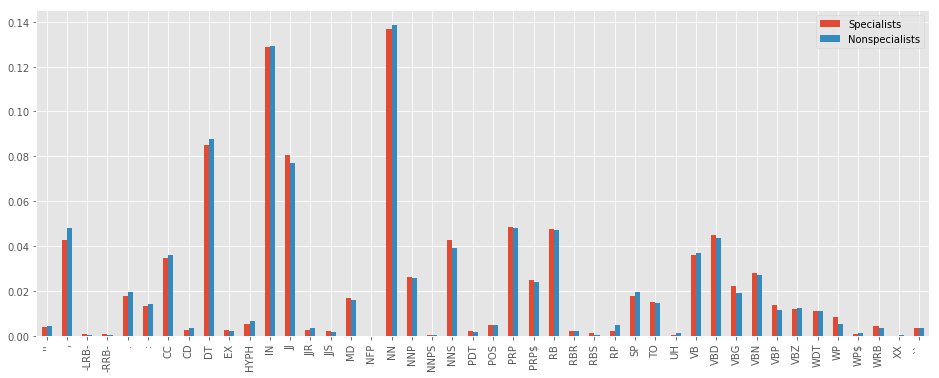

In [54]:
df.plot(kind='bar', figsize=(16,6))

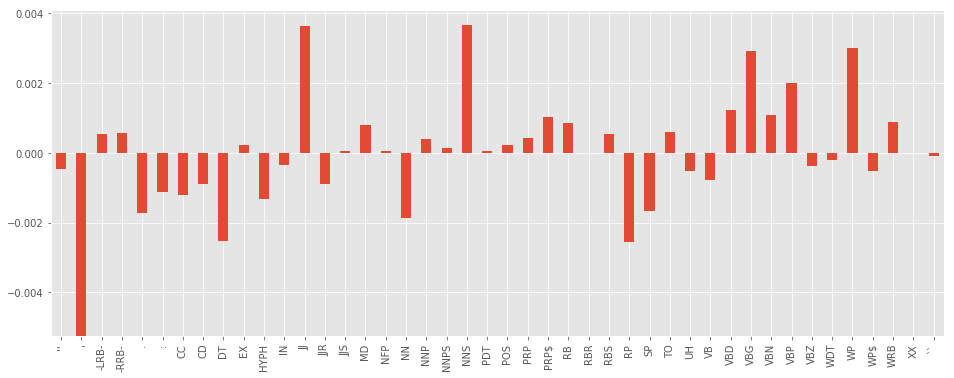

In [58]:
(df['Specialists'] - df['Nonspecialists']).plot(kind='bar', figsize=(16,6))